LHW6 Part 2.1

In [35]:
using LinearAlgebra
(m,n)=(12,4);
A = rand(m,n) + im*rand(m,n)
P = A*inv(conj(A)'*A)*conj(A)'
eigen(P).values

12-element Vector{ComplexF64}:
 -2.0559084236937257e-16 - 5.897997345875163e-17im
 -5.0006379048070246e-17 + 5.841805945606186e-17im
  -4.742978658011813e-17 + 9.941236580361592e-17im
  1.2887506018034512e-17 + 1.6968196779896056e-17im
  1.5371561011185975e-17 + 1.8525468472542606e-16im
  4.2675271520442804e-17 + 4.6561272341931556e-17im
   1.261462132157534e-16 - 2.72675617249312e-16im
  1.6276477108729912e-16 - 5.3399350327075545e-17im
      0.9999999999999983 - 4.0766001685454967e-16im
      0.9999999999999991 - 2.498001805406602e-16im
      0.9999999999999997 + 3.6408795214152744e-16im
      1.0000000000000007 - 4.0729928965045737e-16im

2.1.1 The eigenvalues of P  are n 1s and m-n zeros! 

In [41]:
H= I-2*P
norm(conj(H)'*H - I)

9.478473195681692e-15

2.1.2 It is the identity! 

In [42]:
lambdas = eigen(H).values

12-element Vector{ComplexF64}:
 -1.0000000000000009 - 7.147060721024445e-16im
 -1.0000000000000009 + 8.847089727481716e-16im
 -0.9999999999999996 - 6.904199434387692e-16im
 -0.9999999999999981 + 9.159339953157541e-16im
  0.9999999999999989 + 1.282095130748056e-16im
  0.9999999999999996 - 1.1102230246251565e-16im
  0.9999999999999996 - 5.551115123125783e-17im
                 1.0 - 1.2663481374630692e-16im
  1.0000000000000002 - 1.0755285551056204e-16im
  1.0000000000000002 + 5.551115123125783e-17im
  1.0000000000000007 + 1.2477591173746156e-16im
  1.0000000000000013 + 1.0018028073766061e-16im

Looks like I have n "-1"s and m-n "1"s.  

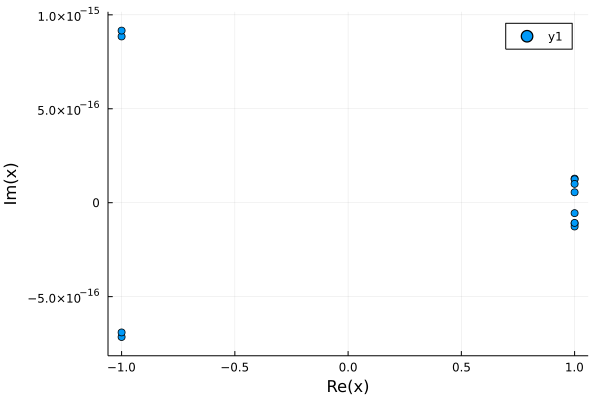

In [43]:
using Plots
plot(lambdas,seriestype = :scatter)

The imaginary bits are tiny! 

# Useful Julia Fragments: Plotting matrices. 

Taken from the "discussions" week 3. Thanks everyone. 

In [44]:
import Pkg; Pkg.add("PyPlot")

    Updating registry at `C:\Users\AllanStruthers\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\AllanStruthers\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\AllanStruthers\.julia\environments\v1.6\Manifest.toml`


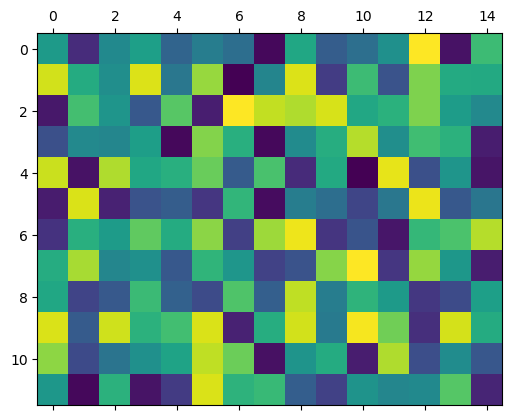

  0.882487 seconds (2.22 M allocations: 130.903 MiB, 5.14% gc time, 94.00% compilation time)


PyObject <matplotlib.image.AxesImage object at 0x000000009D888EB0>

In [45]:
using PyPlot
(m,n)=(12,15)
B=rand(m,n)
@time matshow(B)

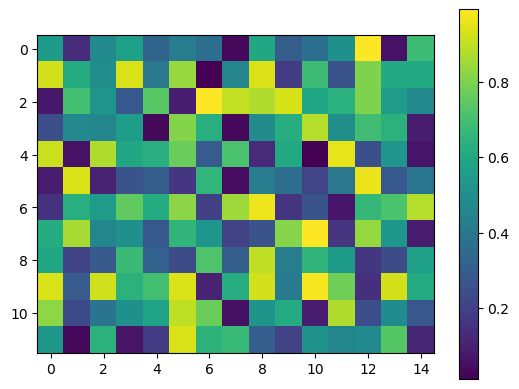

  0.022718 seconds (4.97 k allocations: 278.125 KiB, 39.24% compilation time)


PyObject <matplotlib.colorbar.Colorbar object at 0x0000000092A667C0>

In [46]:
using PyPlot
@time imshow(B)
colorbar()

# Useful Julia Fragments: Matrices. 
1. Square brackets [ ] to get bits of matrices. 
1. ":" for ranges
1. Examples below

In [47]:
(m,n)=(4,5)
B=rand(m,n)

4×5 Matrix{Float64}:
 0.334998  0.573648   0.729593  0.328751  0.160183
 0.668751  0.0661272  0.939369  0.473784  0.557118
 0.382365  0.466294   0.716926  0.98965   0.800424
 0.455185  0.664915   0.874554  0.953918  0.0428766

In [48]:
B[:,2]

4-element Vector{Float64}:
 0.5736480458724706
 0.06612718471595791
 0.46629397249070603
 0.6649149990896877

In [49]:
B[2:4,2]

3-element Vector{Float64}:
 0.06612718471595791
 0.46629397249070603
 0.6649149990896877

In [50]:
B[1:2,3:5]

2×3 Matrix{Float64}:
 0.729593  0.328751  0.160183
 0.939369  0.473784  0.557118

# Julia Loops
for i in 3:12

In [52]:
s=0.0
for i in 3:7
    s+=1.0
    println(i,"\t",s)
end 

3	1.0
4	2.0
5	3.0
6	4.0
7	5.0


# Markdown
Here be Markdown

# QR Interpretation

In [69]:
(m,n)=(12,3)
A= rand(m,n)
Thing = qr(A)
QFake = Thing.Q
R = Thing.R
(norm(QFake'*QFake- I), norm(A-QFake*R))

(1.2591726681379785e-15, 7.157831469485814e-16)

In [70]:
Q= Matrix(QFake)
(norm(Q'*Q- I), norm(A-Q*R))

(7.587229140979892e-16, 6.944442800358888e-16)

In [74]:
x=zeros(12)
x[11:12]=[1.1 2.34]
x=x/norm(x)
n = QFake*x
(dot(n,Q[:,1]),norm(n))

(-1.1102230246251565e-16, 0.9999999999999999)